In [6]:
import pandas as pd

df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/notebooks/hdbbind_litpcba_roc_auc.csv")
df["D"] = df["D"].astype(int)
df.loc[df["Feature"] == "MoLFormer+ECFP","Feature"] = ["HDB-Combo"]*5
df

,Feature,D,Random,Ave
0,ECFP,100,62.5,55.6
1,ECFP,1000,71.7,60.3
2,ECFP,10000,77.9,67.5
3,ECFP,100000,78.5,66.8
4,ECFP,1000000,79.9,69.8
5,MoLFormer,100,67.8,56.5
6,MoLFormer,1000,78.4,61.0
7,MoLFormer,10000,80.8,66.1
8,MoLFormer,100000,84.0,70.4
9,MoLFormer,1000000,83.0,70.0


In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rc('legend', fontsize=20)
import seaborn as sns
sns.set_style("whitegrid")

ECFP
MoLFormer
HDB-Combo
MolCLR
MLP


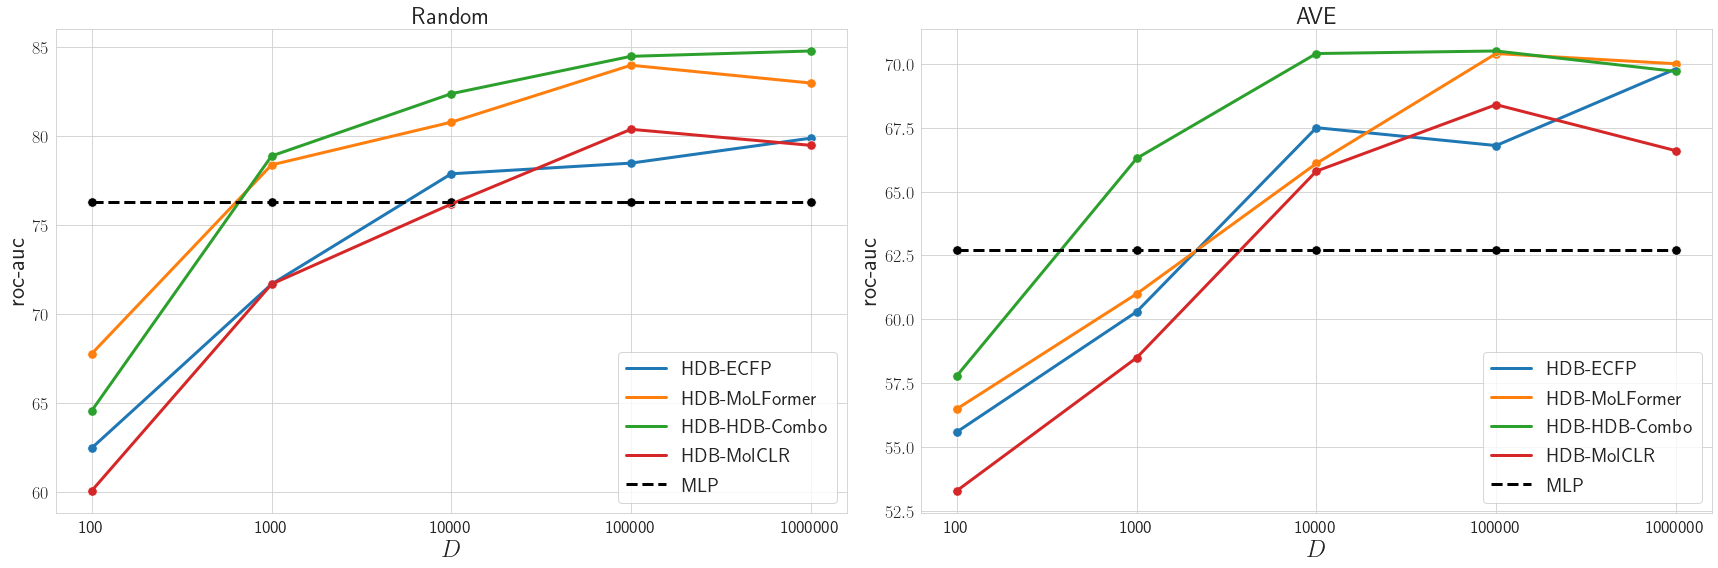

In [8]:
f,ax = plt.subplots(1,2, figsize=(24,8), sharex=True)

for grp, grp_df in df.groupby("Feature", sort=False): # keep sort equal to false to MLP is last entry in legend
    print(grp)
    grp_df["idx"] = list(range(len(grp_df)))
    
    if grp == "MLP":
        sns.lineplot(x="idx", y="Random", data=grp_df, ax=ax[0], label=grp, linewidth=3, linestyle="--", color="black")
        sns.lineplot(x="idx", y="Ave", data=grp_df, ax=ax[1], label=grp, linewidth=3, linestyle="--", color="black")
        sns.scatterplot(x="idx", y="Random", data=grp_df, ax=ax[0], s=90, color="black")
        sns.scatterplot(x="idx", y="Ave", data=grp_df, ax=ax[1], s=90, color="black")
    else:
        sns.lineplot(x="idx", y="Random", data=grp_df, ax=ax[0], label=f"HDB-{grp}", linewidth=3)
        sns.lineplot(x="idx", y="Ave", data=grp_df, ax=ax[1], label=f"HDB-{grp}", linewidth=3)
        
        sns.scatterplot(x="idx", y="Random", data=grp_df, ax=ax[0], s=90)
        sns.scatterplot(x="idx", y="Ave", data=grp_df, ax=ax[1], s=90)

    
    ax[0].set_title("Random")
    ax[1].set_title("AVE")
    
    ax[0].set_ylabel("roc-auc")
    ax[1].set_ylabel("roc-auc")
    plt.xticks([0, 1, 2, 3, 4], ['100', '1000', '10000', '100000', '1000000'])
    ax[0].set_xlabel("$D$")
    ax[1].set_xlabel("$D$")

ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)
plt.tight_layout()
# handles, labels = plt.gca().get_legend_handles_labels()
# result = plt.gca().get_legend_handles_labels()

# import pdb
# pdb.set_trace()
# Sort the handles and labels
# handles, labels = sorted(list(zip(handles, labels)), key=lambda x: x[1])

# Add the sorted handles and labels to the legend
# plt.legend(handles, labels)
plt.savefig("lit-pcba-rocauc-lineplot.png", dpi=450)